In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
images = keras.datasets.cifar10.load_data()

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = images
print(f'X_train_full.shape: {X_train_full.shape}')
print(f'X_train_full.dtype: {X_train_full.dtype}')
print(f'y_train_full.shape: {y_train_full.shape}')
print(f'y_train_full.dtype: {y_train_full.dtype}')
print(f'X_test.shape: {X_test.shape}')
print(f'X_test.dtype: {X_test.dtype}')
print(f'y_test.shape: {y_test.shape}')
print(f'y_test.dtype: {y_test.dtype}')

X_train_full.shape: (50000, 32, 32, 3)
X_train_full.dtype: uint8
y_train_full.shape: (50000, 1)
y_train_full.dtype: uint8
X_test.shape: (10000, 32, 32, 3)
X_test.dtype: uint8
y_test.shape: (10000, 1)
y_test.dtype: uint8


In [4]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [45]:
X_valid, X_train = X_train_full[:10000] / 255.0, X_train_full[10000:] / 255.0

values = []
for data in y_train_full:
    values.append(data[0])

y_valid, y_train = np.asarray(y_train_full[:10000], dtype=np.float32), np.asarray(y_train_full[10000:], dtype=np.float32)
# print(f'y_valid.shape: {y_valid.shape}')
# print(f'y_valid.dtype: {y_valid.dtype}')
# print(f'y_train.shape: {y_train.shape}')
# print(f'y_train.dtype: {y_train.dtype}')

In [46]:
X_train[0]

array([[[0.1372549 , 0.09803922, 0.10196078],
        [0.10588235, 0.08235294, 0.08235294],
        [0.09803922, 0.07843137, 0.0745098 ],
        ...,
        [0.51764706, 0.50588235, 0.50588235],
        [0.52156863, 0.4745098 , 0.45490196],
        [0.49411765, 0.45098039, 0.44313725]],

       [[0.24705882, 0.21568627, 0.19607843],
        [0.1254902 , 0.10588235, 0.08235294],
        [0.06666667, 0.05098039, 0.03137255],
        ...,
        [0.4       , 0.37254902, 0.34509804],
        [0.41176471, 0.34901961, 0.29803922],
        [0.39215686, 0.3372549 , 0.30196078]],

       [[0.38823529, 0.35686275, 0.32941176],
        [0.19215686, 0.17647059, 0.14509804],
        [0.05882353, 0.04705882, 0.01960784],
        ...,
        [0.18039216, 0.16862745, 0.15294118],
        [0.20392157, 0.16078431, 0.13333333],
        [0.20392157, 0.17254902, 0.16078431]],

       ...,

       [[0.65098039, 0.64705882, 0.67058824],
        [0.64313725, 0.63921569, 0.65098039],
        [0.64313725, 0

In [47]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               921900    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='sparse_categorical_crossentropy',
optimizer="sgd",
metrics=['accuracy'])

In [55]:
history= model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3324 - accuracy: 0.5223 - val_loss: 1.4265 - val_accuracy: 0.4948
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3169 - accuracy: 0.5303 - val_loss: 1.4326 - val_accuracy: 0.4910
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3101 - accuracy: 0.5302 - val_loss: 1.4306 - val_accuracy: 0.4941
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3044 - accuracy: 0.5349 - val_loss: 1.4295 - val_accuracy: 0.4918
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2998 - accuracy: 0.5367 - val_loss: 1.4295 - val_accuracy: 0.4998
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2954 - accuracy: 0.5374 - val_loss: 1.4253 - val_accuracy: 0.4954
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2917 - accuracy: 0.5391 - val_loss: 1.4285 - val_ac

KeyboardInterrupt: 

In [27]:
model.evaluate(X_test / 255.0 , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4565 - accuracy: 0.4808


[1.4564915895462036, 0.48080000281333923]

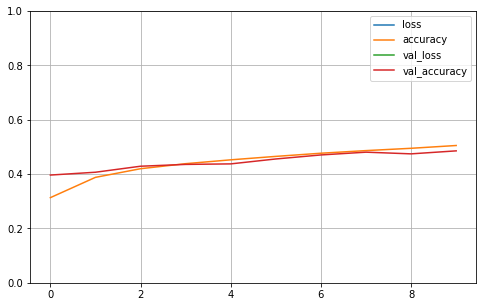

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()